In [110]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import os
import cv2
focal_length = 167.5

In [111]:
classes = ["person","bicycle","car","motorbike","aeroplane","bus","train","truck","boat","traffic light","fire hydrant","stop sign","parking meter","bench","bird","cat","dog","horse","sheep","cow","elephant","bear","zebra","giraffe","backpack","umbrella","handbag","tie","suitcase","frisbee","skis","snowboard","sports ball","kite","baseball bat","baseball glove","skateboard","surfboard","tennis racket","bottle","wine glass","cup","fork","knife","spoon","bowl","banana","apple","sandwich","orange","broccoli","carrot","hot dog","pizza","donut","cake","chair","sofa","potted plant","bed","dining table","toilet","TV monitor","laptop","mouse","remote","keyboard","cell phone","microwave","oven","toaster","sink","refrigerator","book","clock","vase","scissors","teddy bear","hair dryer","toothbrush"]

In [112]:
objects_real_width = {
"person":180,
"bicycle":220,
"car":500,
"motorbike":220,
"aeroplane":800,
"bus":300,
"train":2000,
"truck":400,
"boat":800,
"traffic light":150,
"fire hydrant":80,
"stop sign":120,
"parking meter":80,
"bench":180,
"bird":50,
"cat":40,
"dog":50,
"horse":200,
"sheep":120,
"cow":200,
"elephant":600,
"bear":250,
"zebra":300,
"giraffe":600,
"backpack":60,
"umbrella":150,
"handbag":50,
"tie":40,
"suitcase":200,
"frisbee":30,
"skis":200,
"snowboard":200,
"sports ball":30,
"kite":80,
"baseball bat":100,
"baseball glove":60,
"skateboard":120,
"surfboard":200,
"tennis racket":100,
"bottle":30,
"wine glass":30,
"cup":11,
"fork":30,
"knife":30,
"spoon":30,
"bowl":30,
"banana":20,
"apple":10,
"sandwich":20,
"orange":10,
"broccoli":30,
"carrot":20,
"hot dog":20,
"pizza":30,
"donut":20,
"cake":30,
"chair":100,
"sofa":200,
"potted plant":120,
"bed":200,
"dining table":300,
"toilet":120,
"TV monitor":150,
"laptop":40,
"mouse":10,
"remote":10,
"keyboard":40,
"cell phone":10,
"microwave":60,
"oven":80,
"toaster":40,
"sink":80,
"refrigerator":200,
"book":30,
"clock":30,
"vase":80,
"scissors":30,
"teddy bear":80,
"hair dryer":30,
"toothbrush":10
}

In [113]:
def estimate_focal_length(img, heat_map, dim, center, RealDistance, RealHeight, cv = False):
    x1, x2, y1, y2 = dim
    c1, c2 = center
    img[y1:y1+5] = 0
    img[y2:y2+5] = 0
    img[:,x1:x1+5] = 0
    img[:,x2:x2+5] = 0
    ImageHeight = y1-y2
    ImageWidth = x2-x1
    print(f'Image Width = {ImageWidth} pixels')
    print(f'Image Height = {ImageHeight} pixels')
    print(f'Real Height = {RealHeight} cm')
    print(f'Real Distance = {RealDistance} cm')
    # print(f'Focal Distance = {6.04} mm')
    if (cv):
        gray_heat_map = cv2.cvtColor(heat_map, cv2.COLOR_BGR2GRAY)
    else:
        gray_heat_map = rgb2gray(heat_map)
    heat_map[c1] = 1
    heat_map[:, c2] = 1
    print(f'Depth Val = {gray_heat_map[c1, c2]}')
    DepthVal = gray_heat_map[c1, c2]
    # DepthVal = 0.282
    print(f'Computed Focal Length = {(RealDistance*max(ImageHeight, ImageWidth)*DepthVal)/(RealHeight)}')
    print(f'Estimated Distance with 167.5: {(167.5*RealHeight)/(max(ImageHeight, ImageWidth)*DepthVal)}')
    #Show them next to each other
    _, ax = plt.subplots(1, 3, figsize=(20, 10))
    ax[0].imshow(img)
    ax[0].set_title('Original Image')
    ax[1].imshow(heat_map)
    ax[1].set_title('Depth Map')
    ax[2].imshow(gray_heat_map)
    ax[2].set_title('Grayscale Map')

Image Width = 215 pixels
Image Height = 195 pixels
Real Height = 11 cm
Real Distance = 50 cm
Depth Val = 0.2773294150829315
Computed Focal Length = 271.0264738310467
Estimated Distance with 167.5: 30.90104033608478


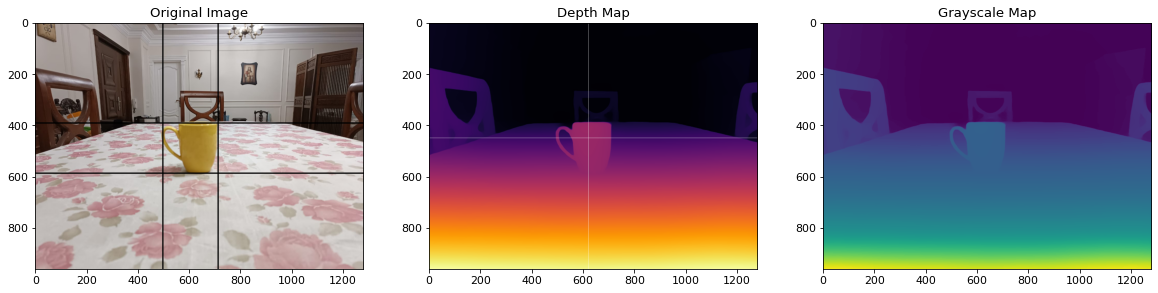

In [114]:
nos = plt.imread('images/originals/Nos.jpg')
nos_heat_map = plt.imread('images/heat_maps/Nos-dpt_beit_large_512.png')
estimate_focal_length(nos, nos_heat_map, (495, 710, 585, 390), (450, 620), 50, 11, cv = True)

Image Width = 425 pixels
Image Height = 390 pixels
Real Height = 11 cm
Real Distance = 25 cm
Depth Val = 0.4526274800300598
Computed Focal Length = 437.1969977563078
Estimated Distance with 167.5: 9.578062112709427


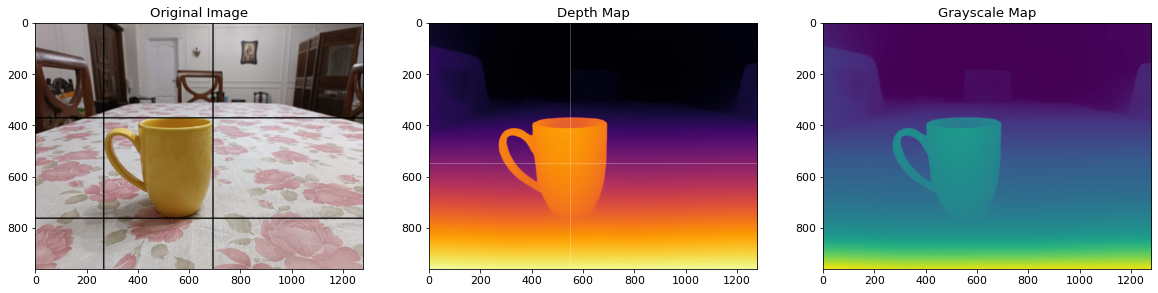

In [115]:
rob3 = plt.imread('images/originals/Rob3.jpg')
rob3_heat_map = plt.imread('images/heat_maps/Rob3-dpt_beit_large_512.png')
estimate_focal_length(rob3, rob3_heat_map, (265, 690, 760, 370), (550, 550), 25, 11, cv = True)

Image Width = 115 pixels
Image Height = 110 pixels
Real Height = 11 cm
Real Distance = 100 cm
Depth Val = 0.16641569137573242
Computed Focal Length = 173.98004098372027
Estimated Distance with 167.5: 96.27541127874167


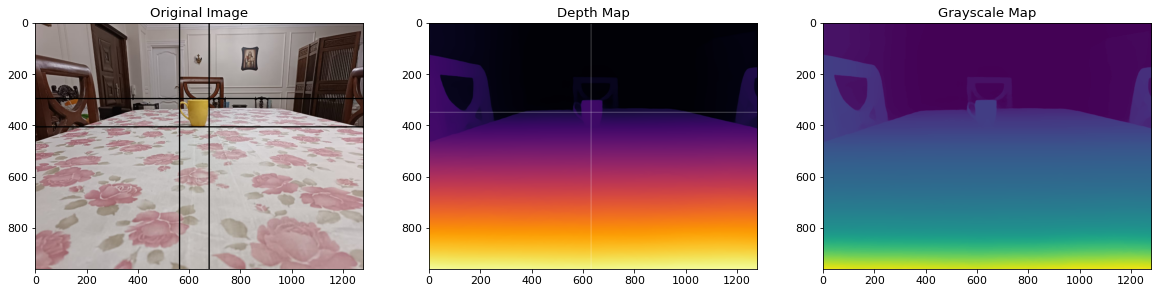

In [116]:
img1 = plt.imread('images/originals/1.jpg')
img1_heat_map = plt.imread('images/heat_maps/1-dpt_beit_large_512.png')
estimate_focal_length(img1, img1_heat_map, (560, 675, 405, 295), (350, 630), 100, 11, cv = True)

Image Width = 85 pixels
Image Height = 72 pixels
Real Height = 11 cm
Real Distance = 150 cm
Depth Val = 0.11149804294109344
Computed Focal Length = 129.2363679544492
Estimated Distance with 167.5: 194.41122029099103


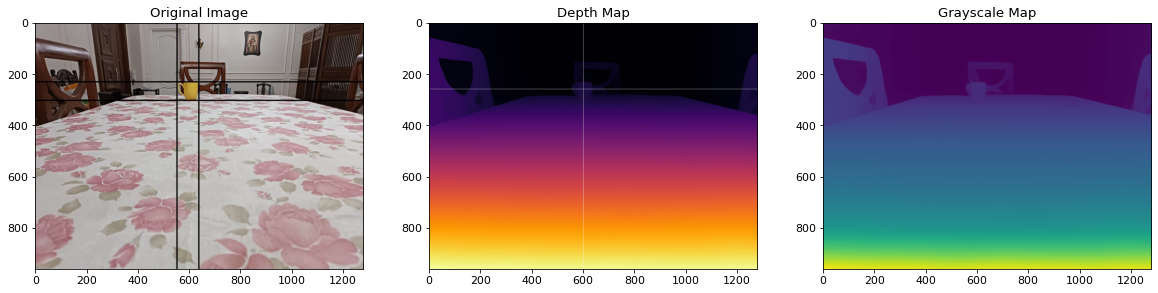

In [117]:
img1_5 = plt.imread('images/originals/1 w nos.jpg')
img1_5_heat_map = plt.imread('images/heat_maps/1 w nos-dpt_beit_large_512.png')
estimate_focal_length(img1_5, img1_5_heat_map, (550, 635, 302, 230), (260, 600), 150, 11, cv = True)